<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1:
#### Was to familiarize oneself with the data. No actual assignment. DONE.
## Task 2: 
#### Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot


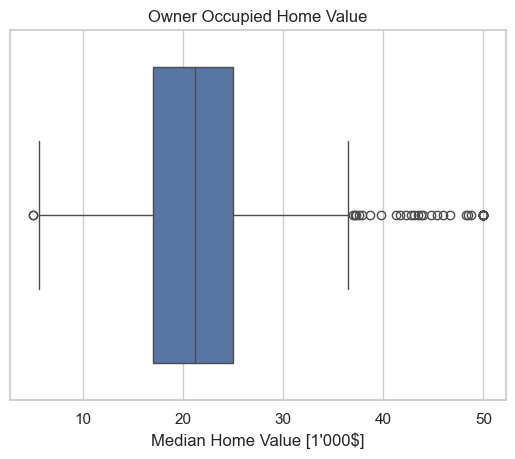

In [55]:
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set_title('Owner Occupied Home Value')
ax.set_xlabel('Median Home Value [1\'000$]')
pyplot.show()

#### Task 2.2: Provide a  bar plot for the Charles river variable
Show average values of crime rate depending on charles river variable.

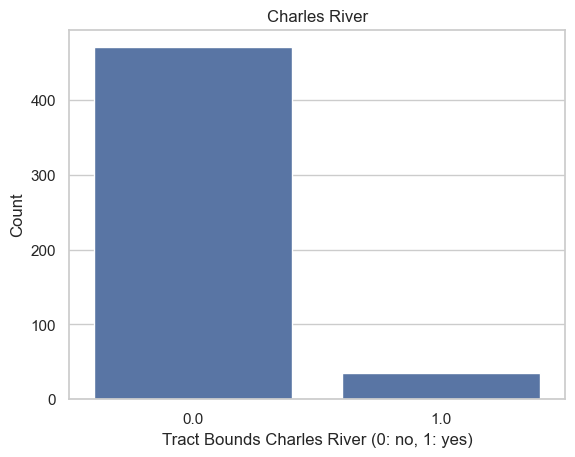

In [63]:
chas_crim = boston_df.groupby('CHAS')[['CRIM']].mean().reset_index()
sns.set(style="whitegrid")
ax = sns.countplot(x=boston_df['CHAS'])
ax.set_title('Charles River')
ax.set_xlabel('Tract Bounds Charles River (0: no, 1: yes)')
ax.set_ylabel('Count')
pyplot.show()

#### Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable.
##### Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

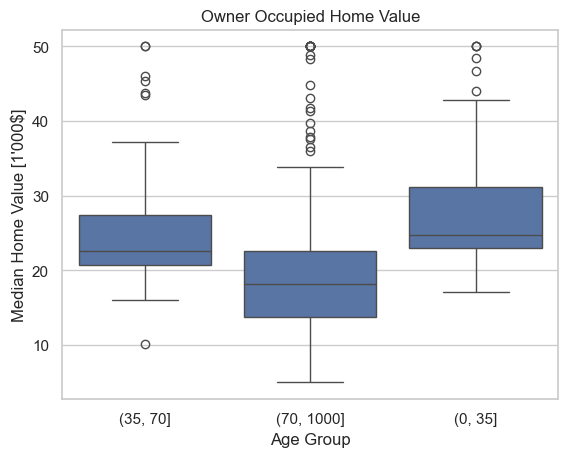

In [10]:
bins = [0, 35, 70, 1000]
boston_df["age_buckets"] = pd.cut(boston_df.AGE, bins).astype(str)
ax = sns.boxplot(x='age_buckets', y='MEDV', data=boston_df)
ax.set_title('Owner Occupied Home Value')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Home Value [1\'000$]')
pyplot.show()

#### Task 2.4a: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


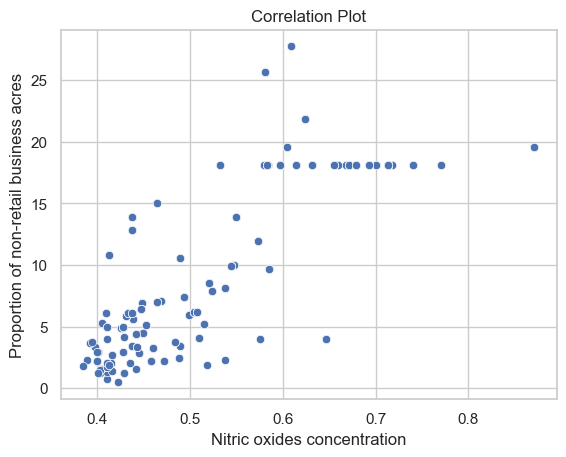

In [12]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Correlation Plot')
ax.set_xlabel('Nitric oxides concentration')
ax.set_ylabel('Proportion of non-retail business acres')
pyplot.show()

#### Task 2.4b: What can you say about the relationship?
##### There is a positive correlation between the two variables
#### Proof:
This also answers the question in task 3.3.

Here I use corr method of pandas dataframe. Furtherdown the same result is obtained with pearsonr method of scipy.

In [14]:
boston_df[['NOX', 'INDUS']].corr(method='pearson')

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


#### Task 2.5: Create a histogram for the pupil to teacher ratio variable


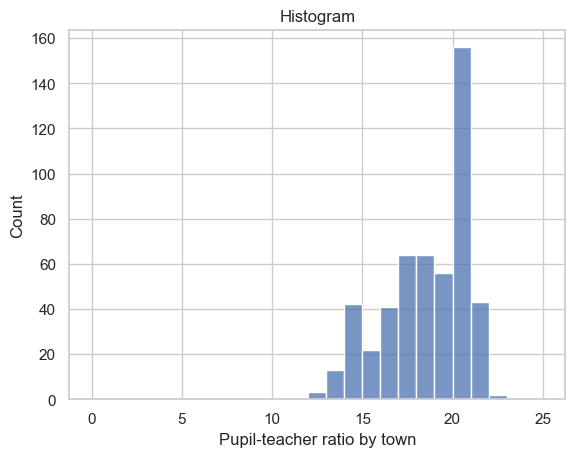

In [16]:
ax = sns.histplot(x='PTRATIO', data=boston_df, binwidth=1, binrange=[0,25])
ax.set_title('Histogram')
ax.set_xlabel('Pupil-teacher ratio by town')
ax.set_ylabel('Count')
pyplot.show()

## Task 3:
#### Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not?
Use T-test for independent samples.


State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

I use **alpha = 0.05**.

In [19]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

* Since the p-value is smaller than 0.05 we **cannot** assume equality of variance

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not.

#### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
Use ANOVA. The three age buckets are as in task 2.3.

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$: no difference in MEDV between the three age buckets
*   $H\_1:$ At least one of the means differ


In [25]:
scipy.stats.levene(boston_df[boston_df['age_buckets'] == '(0, 35]']['MEDV'],
                   boston_df[boston_df['age_buckets'] == '(35, 70]']['MEDV'], 
                   boston_df[boston_df['age_buckets'] == '(70, 1000]']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is larger than 0.05, we can assume the variances are equal.

In [27]:
age_to_35 = boston_df[boston_df['age_buckets'] == '(0, 35]']['MEDV']
age_35_to_70 = boston_df[boston_df['age_buckets'] == '(35, 70]']['MEDV']
age_70_above = boston_df[boston_df['age_buckets'] == '(70, 1000]']['MEDV']

In [28]:
f_statistic, p_value = scipy.stats.f_oneway(age_to_35, age_35_to_70, age_70_above)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differs.


### Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?
(Pearson Correlation)
#### No we cannot conclude that. As seen from plot in task 2.4b and correlation value of around 0.76 there is a fairly strong correlation between the two variables.

The same result can be optained with the pearsonr method of scipy as used in one of the tutorial videos.

In [31]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

### Task 3.4 What is the impact of the weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
(Regression analysis)

*   $H\_0: β1$ = 0: distance to employment centers has **no** effect on median house values
*   $H\_1: β1$ is not equal to 0: distance to employment centers has effect on median house values 

In [33]:
## X is the input variables (or independent variables) - here the weighted distance
X = boston_df['DIS']
## y is the target/dependent variable - here the median value of owner occupied houses
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        18:53:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: The p-value is less than the 0.05, so we reject the null hypothesis meaning that the distance to the employment centers does have an effect on median housing values!

The same can be obtained by correlation:

In [35]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=0.24992873408590385, pvalue=1.2066117273371441e-08)